In [88]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import scipy as scp
import statistics
from scipy.stats import pearsonr

data1 = pd.read_csv("credit_immo.csv")
data2 = pd.read_csv("tendance_centrale.csv")
data3 = pd.read_csv("Montant_Temps.csv")
data4 = pd.read_json("credit_immo.json")
# data5 = pd.read_excel("credit_immo.xls")
data6 = pd.read_csv("iris.csv")





In [10]:
data1

,ID_NOM,Niv_Etude_Bac,age,contrat_de_travail,Salaire,dette_anterieure,etat_civile,apport,enfant_a_Charge,Solvable
0,jean,3.0,45,CDI,40000,4000,M,0.3,3.0,OUI
1,VANESSA,5.0,28,CDI,30500,1320,M,0.1,0.0,OUI
2,TARCISSE,0.0,55,CDI,28000,40000,C,0.0,0.0,NON
3,TIBAULT,4.0,23,CDD,15000,0,M,0.1,NaN,OUI
4,GILES,0.0,33,CDD,27000,3000,C,0.1,2.0,NON
5,ETHAN,0.0,41,INTERIM,40000,1000,M,0.0,4.0,NON
6,LILIANE,-1.0,29,CDI,50000,3000,C,0.0,0.0,NON
7,GLODI,-3.0,24,INTERIM,29000,5000,C,0.0,0.0,NON
8,FLORIANE,NaN,26,CDI,44000,0,M,0.1,1.0,OUI
9,MARIE,3.0,37,CDI,45800,2000,M,0.2,2.0,OUI


In [12]:
data3

,Montant_du_capitale,Temps
0,1,5
1,12,6
2,13,7
3,2,8
4,3,9
5,0,10
6,1,11
7,6,12
8,7,13
9,4,14


### Attribution de données aléatoires

In [90]:
# np.random.rand(features,columns)
data7 = pd.DataFrame(np.random.rand(6, 4), columns = ["taux_de_ventes","croissance_vente","ratio_benefice", "ratio_perte"], index  = [1 , 3 , 4 , 6 , 7 , 8])
data7

,taux_de_ventes,croissance_vente,ratio_benefice,ratio_perte
1,0.386871,0.189235,0.803488,0.604367
3,0.305586,0.160008,0.540611,0.851261
4,0.517459,0.141448,0.913955,0.124043
6,0.964046,0.652314,0.356409,0.204603
7,0.127041,0.780208,0.759960,0.181810
8,0.369239,0.591011,0.168449,0.751687


In [91]:
data8 = data7.reindex([1 ,2, 3 , 4,5 ,6,7, 8])
data8

,taux_de_ventes,croissance_vente,ratio_benefice,ratio_perte
1,0.386871,0.189235,0.803488,0.604367
2,NaN,NaN,NaN,NaN
3,0.305586,0.160008,0.540611,0.851261
4,0.517459,0.141448,0.913955,0.124043
5,NaN,NaN,NaN,NaN
6,0.964046,0.652314,0.356409,0.204603
7,0.127041,0.780208,0.759960,0.181810
8,0.369239,0.591011,0.168449,0.751687


### Suppression des données manquantes

In [95]:
dataB = data8.dropna()
dataB

,taux_de_ventes,croissance_vente,ratio_benefice,ratio_perte
1,0.386871,0.189235,0.803488,0.604367
3,0.305586,0.160008,0.540611,0.851261
4,0.517459,0.141448,0.913955,0.124043
6,0.964046,0.652314,0.356409,0.204603
7,0.127041,0.780208,0.759960,0.181810
8,0.369239,0.591011,0.168449,0.751687


In [25]:
data9 = data8.isnull()
data9

,taux_de_ventes,croissance_vente,ratio_benefice,ratio_perte
taux_de_ventes,False,False,False,False
croissance_vente,False,False,False,False
ratio_benefice,False,False,False,False
ratio_perte,False,False,False,False


In [30]:
data10 = data7.fillna(0)
data10

,taux_de_ventes,croissance_vente,ratio_benefice,ratio_perte
0,0,0,0,0
1,0,0,0,0
2,0,0,0,0
3,0,0,0,0


## 3. Traitement de données

### 3.1 Importer les données

In [40]:
import pandas as pd 
import numpy as np 
import matplotlib as plt
import scipy as scp
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

### 3.2 Importer le jeu de données (data-set).

In [3]:
data1 = pd.read_csv("credit_immo.csv")
data1

,ID_NOM,Niv_Etude_Bac,age,contrat_de_travail,Salaire,dette_anterieure,etat_civile,apport,enfant_a_Charge,Solvable
0,jean,3.0,45,CDI,40000,4000,M,0.3,3.0,OUI
1,VANESSA,5.0,28,CDI,30500,1320,M,0.1,0.0,OUI
2,TARCISSE,0.0,55,CDI,28000,40000,C,0.0,0.0,NON
3,TIBAULT,4.0,23,CDD,15000,0,M,0.1,NaN,OUI
4,GILES,0.0,33,CDD,27000,3000,C,0.1,2.0,NON
5,ETHAN,0.0,41,INTERIM,40000,1000,M,0.0,4.0,NON
6,LILIANE,-1.0,29,CDI,50000,3000,C,0.0,0.0,NON
7,GLODI,-3.0,24,INTERIM,29000,5000,C,0.0,0.0,NON
8,FLORIANE,NaN,26,CDI,44000,0,M,0.1,1.0,OUI
9,MARIE,3.0,37,CDI,45800,2000,M,0.2,2.0,OUI


### 3.3 Transformer les valeurs manquantes en moyenne (SimpleImputer).

In [27]:
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
data1_imput = imputer.fit_transform(data1.select_dtypes(np.number))
data1_imput

array([[ 3.00000000e+00,  4.50000000e+01,  4.00000000e+04,
         4.00000000e+03,  0.00000000e+00,  3.00000000e+00],
       [ 5.00000000e+00,  2.80000000e+01,  3.05000000e+04,
         1.32000000e+03,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  5.50000000e+01,  2.80000000e+04,
         4.00000000e+04,  0.00000000e+00,  0.00000000e+00],
       [ 4.00000000e+00,  2.30000000e+01,  1.50000000e+04,
         0.00000000e+00,  0.00000000e+00,  1.33333333e+00],
       [ 0.00000000e+00,  3.30000000e+01,  2.70000000e+04,
         3.00000000e+03,  0.00000000e+00,  2.00000000e+00],
       [ 0.00000000e+00,  4.10000000e+01,  4.00000000e+04,
         1.00000000e+03,  0.00000000e+00,  4.00000000e+00],
       [-1.00000000e+00,  2.90000000e+01,  5.00000000e+04,
         3.00000000e+03,  0.00000000e+00,  0.00000000e+00],
       [-3.00000000e+00,  2.40000000e+01,  2.90000000e+04,
         5.00000000e+03,  0.00000000e+00,  0.00000000e+00],
       [ 1.44444444e+00,  2.60000000e+01,  4.400

### 3.4 Encoder les valeurs catégoriques (LabelEncoder).


In [32]:
encode1 = LabelEncoder()
data1_encoded = encode1.fit_transform(data1['contrat_de_travail'])
data1_encoded

array([1, 1, 1, 0, 0, 3, 1, 3, 1, 1, 1, 0, 3, 1, 0, 2, 1, 1, 1])

### 3.5 Fractionner le jeu de données pour l’entrainement et le test (Training and Test set).

In [37]:
data1['Salaire'].value_counts(normalize = True)
data1_sample = data1.groupby('Salaire').apply(lambda x:x.sample(frac=0.1))
data1_sample['Salaire'].value_counts(normalize=True)

Series([], Name: Salaire, dtype: float64)

### 3.6 mise à l’échelle des features (StandardScaler).

In [45]:
data1_num = data1.select_dtypes(include=[np.number]) 
scaler = StandardScaler(with_mean = True, with_std = True)
rescaled = scaler.fit_transform(data1_num)
pd.DataFrame(rescaled, index=data1_num.index, columns=data1_num.columns)

,Niv_Etude_Bac,age,Salaire,dette_anterieure,apport,enfant_a_Charge
0,0.569181,0.699645,-0.159400,-0.342231,0.0,1.290994
1,1.300985,-0.777383,-0.613929,-0.458469,0.0,-1.032796
2,-0.528525,1.568485,-0.733541,1.219175,0.0,-1.032796
3,0.935083,-1.211803,-1.355528,-0.515720,0.0,NaN
4,-0.528525,-0.342963,-0.781386,-0.385603,0.0,0.516398
5,-0.528525,0.352109,-0.159400,-0.472348,0.0,2.065591
6,-0.894427,-0.690499,0.319051,-0.385603,0.0,-1.032796
7,-1.626231,-1.124919,-0.685696,-0.298859,0.0,-1.032796
8,NaN,-0.951151,0.031981,-0.515720,0.0,-0.258199
9,0.569181,0.004573,0.118102,-0.428976,0.0,0.516398


### 4. Visualisation des données 

In [49]:
data3 = pd.read_csv("Montant_Temps.csv")
data3

,Montant_du_capitale,Temps
0,1,5
1,12,6
2,13,7
3,2,8
4,3,9
5,0,10
6,1,11
7,6,12
8,7,13
9,4,14


### 4.1 Rajoutez du style à vos graphiques

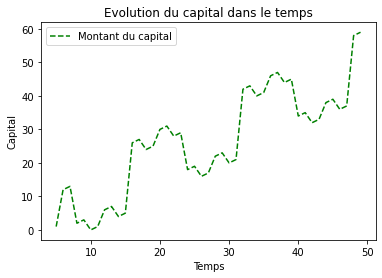

In [54]:
plt.plot(data3['Temps'], data3['Montant_du_capitale'] , label="Montant du capital", color = "green", linestyle = 'dashed')
plt.xlabel("Temps")
plt.ylabel("Capital")
plt.title("Evolution du capital dans le temps")
plt.legend()

### 4.2 Visualisation de données sous forme de nuage de points

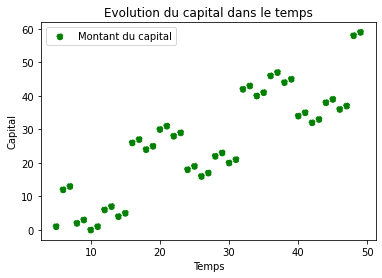

In [55]:
plt.scatter(data3['Temps'], data3['Montant_du_capitale'] , label="Montant du capital", color = "green", linestyle = 'dashed')
plt.xlabel("Temps")
plt.ylabel("Capital")
plt.title("Evolution du capital dans le temps")
plt.legend()

### 5.Analyse de données
#### 5.1  Mesure de tendance centrale

In [57]:
data2


,Nom,Age,Rating
0,ANATOLE,55,4.53
1,Vincent,59,3.54
2,Brenda,55,3.98
3,Philippe,53,5.59
4,Michel,30,3.50
5,Tillier,59,4.90
6,Blanchard,53,3.80
7,perez,34,3.78
8,théo,40,5.98
9,cyprien,30,4.80


In [60]:
data2["Age"].agg([np.mean, np.std, np.median, np.min, np.max])

mean      45.647059
std       10.723462
median    49.000000
amin      30.000000
amax      59.000000
Name: Age, dtype: float64

In [61]:
data2["Rating"].agg([np.mean, np.std, np.median, np.min, np.max])

mean      4.438824
std       0.800390
median    4.300000
amin      3.500000
amax      5.980000
Name: Rating, dtype: float64

In [64]:
data2['Rating'].value_counts()

3.95    2
4.30    2
5.98    2
4.80    2
3.78    2
4.90    1
3.80    1
3.98    1
5.59    1
3.54    1
4.53    1
3.50    1
Name: Rating, dtype: int64

In [69]:
statistics.mode(data2['Rating'])

3.78

In [65]:
data2['Age'].value_counts()

53    4
30    3
59    2
55    2
49    2
40    2
34    2
Name: Age, dtype: int64

In [70]:
statistics.mode(data2['Age'])

53

### 5.2 Analyse de la variance

In [72]:
statistics.variance(data2['Age'])

114.99264705882352

In [74]:
statistics.variance(data2['Rating'])

0.6406235294117649

### 5.3 Analyse de corrélations

In [75]:
data2.corr()

,Age,Rating
Age,1.000000,-0.069229
Rating,-0.069229,1.000000


In [82]:
data2.corr(method='kendall')

,Age,Rating
Age,1.000000,0.063281
Rating,0.063281,1.000000


In [83]:
data2.corr(method = 'pearson')

,Age,Rating
Age,1.000000,-0.069229
Rating,-0.069229,1.000000


In [81]:
x = data2['Age']
y = data2['Rating']
coeff_pearson,_ = pearsonr(x,y)
coeff_pearson

-0.06922926485445213

##### Il n'y a pas decorrélation  entre 'Age' et ' Rating' car la corrélation de Pearson est proche de 0.
La relation est non linéaire. 

### 5.3.1 Analyse graphique

In [117]:
data6


,longueur_sepal,largeur_sepal,longueur_petal,largeur_petal,espèce
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
import seaborn as sns 

data6 = pd.read_csv("iris.csv")



In [3]:
data6.groupby("espèce").nunique()

,longueur_sepal,largeur_sepal,longueur_petal,largeur_petal,espèce
espèce,,,,,
setosa,15,16,9,6,1
versicolor,21,14,19,9,1
virginica,21,13,20,12,1


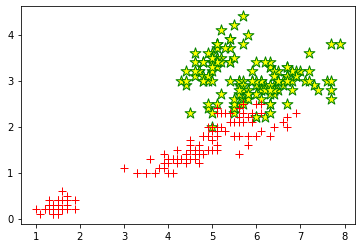

In [11]:
X = data6['espèce']
Y1 = data6['longueur_sepal']
Y2 = data6['largeur_sepal']
Y3 = data6['longueur_petal']
Y4 = data6['largeur_petal']
plt.scatter(Y1, Y2, s = 130, c = 'yellow', marker = '*', edgecolors = 'green')
plt.scatter(Y3, Y4, s = 50, c = 'red', marker = '+', linewidth = 1)


#### A travers ce graphique, on peut observer 3 groupes voire 4 qui se détachent.

### 5.3.2 Analyse mathématique

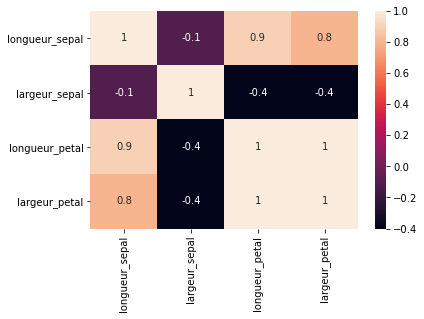

In [6]:
matrice_corr = data6.corr().round(1)
sns.heatmap(data=matrice_corr, annot=True)

#### A travers ce tableau, on remarque une corrélation entre la longueur des pétales et la largeur des pétales. 